# Stanford CME 241 (Winter 2024) - Assignment 6

**Due: Feb 19 @ 11:59pm Pacific Time on Gradescope.**

Assignment instructions:
- **Solve all 3 questions.**
- Empty code blocks are for your use. Feel free to create more under each section as needed.

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/skvod03/cme241_assigment6/blob/main/assignment6.ipynb

*Group members (replace below names with people in your group):* 
- Olivia Weiner
- Dmitrii Skvortosv
- Zachary Witzel

## Imports

## Question 1
We consider a special case of the Optimal Market-Making problem we
covered in class (Avellandea-Stoikov formulation) where the market-maker
has a cash amount of $W \in \mathbb{R}$ at time 0 and an inventory of
shares equal to $I \in \mathbb{Z}$ (note: this could be positive or
negative), but is not going to be market-making until time $T$. The
market maker's *Value Function* at time $t$ (with $0 \leq t \leq T$) is
given by the Expected Utility at time $T$ (conditional on the time $t$
and the OB Mid Price $S_t$ at time $t$):

$$V(t, S_t, W, I) = \mathbb{E}[-e^{-\gamma \cdot (W + I \cdot S_T)} | (t, S_t)]$$

Assume the same process for the OB Mid Price as we had covered in class:

$$dS_t = \sigma \cdot dz_t$$

for some fixed $\sigma \in \mathbb{R}^+$. This means:

$$S_{t_2} \sim \mathcal{N}(S_{t_1}, \sigma^2 \cdot (t_2 - t_1))$$

for all $0 \leq t_1 \leq t_2$.

-   Under this process for $S_t$, evaluate the conditional expectation
    $\mathbb{E}[-e^{-\gamma \cdot (W + I \cdot S_T)} | (t, S_t)]$ so you
    have a simple expression for $V(t, S_t, W, I)$.

-   Using the above expression for $V(t, S_t, W, I)$, calculate the
    Indifference Bid Price $Q^{(b)}(t, S_t, I)$ and the Indifference Ask
    Price $Q^{(a)}(t,S_t,I)$, which have the same definitions as we had
    covered in class, as follows:

    $$V(t,S_t,W - Q^{(b)}(t, S_t, I), I + 1) = V(t,S_t,W, I)$$
    $$V(t,S_t,W + Q^{(a)}(t, S_t, I), I - 1) = V(t,S_t,W, I)$$

We consider a special case of the Optimal Market-Making problem we
covered in class (Avellandea-Stoikov formulation) where the market-maker
has a cash amount of $W \in \mathbb{R}$ at time 0 and an inventory of
shares equal to $I \in \mathbb{Z}$ (note: this could be positive or
negative), but is not going to be market-making until time $T$. The
market maker's *Value Function* at time $t$ (with $0 \leq t \leq T$) is
given by the Expected Utility at time $T$ (conditional on the time $t$
and the OB Mid Price $S_t$ at time $t$):

$$V(t, S_t, W, I) = \mathbb{E}[-e^{-\gamma \cdot (W + I \cdot S_T)} | (t, S_t)]$$

Assume the same process for the OB Mid Price as we had covered in class:

$$dS_t = \sigma \cdot dz_t$$

for some fixed $\sigma \in \mathbb{R}^+$. This means:

$$S_{t_2} \sim \mathcal{N}(S_{t_1}, \sigma^2 \cdot (t_2 - t_1))$$

for all $0 \leq t_1 \leq t_2$.

-   Under this process for $S_t$, evaluate the conditional expectation
    $\mathbb{E}[-e^{-\gamma \cdot (W + I \cdot S_T)} | (t, S_t)]$ so you
    have a simple expression for $V(t, S_t, W, I)$.

-   Using the above expression for $V(t, S_t, W, I)$, calculate the
    Indifference Bid Price $Q^{(b)}(t, S_t, I)$ and the Indifference Ask
    Price $Q^{(a)}(t,S_t,I)$, which have the same definitions as we had
    covered in class, as follows:

    $$V(t,S_t,W - Q^{(b)}(t, S_t, I), I + 1) = V(t,S_t,W, I)$$
    $$V(t,S_t,W + Q^{(a)}(t, S_t, I), I - 1) = V(t,S_t,W, I)$$

## Question 2
We'd like to test the performance of the Optimal Policy we derived in
class for the Optimal Market-Making problem. In particular, we want to
compare this Optimal Policy against a policy (call it "Naive Policy")
that is always symmetric around the OB Mid Price (rather than around the
Indifference Price) with a constant Bid-Ask Spread equal to the average
Bid-Ask Spread of the Optimal Policy.

We will do the comparison by generating a large number of simulation
traces. Each simulation trace consists of $\frac T {\Delta t}$ time
steps. The time step $\Delta t$ needs to be small enough so that the
probability of multiple orders transacting with the market-maker is
small but needs to be large enough so that there are indeed orders that
transact with the market-maker. In their paper, Avallaneda-Stoikov point
out that $\Delta t = 0.005$ worked well in their simulation experiments.

Here are the details on how to perform a time step in each simulation
trace for the Optimal Policy:

-   At each time $t$, we observe the *State*, and calculate the Optimal
    Action $(P_t^{(b)^*}, P_t^{(a)^*})$.

-   With probability
    $c \cdot e^{-k \cdot \delta_t^{(a)^*}} \cdot \Delta t$, the
    inventory variable is decremented by 1 and the trading PnL is
    increased by $P_t^{(a)^*}$.

-   With probability
    $c \cdot e^{-k \cdot \delta_t^{(b)^*}} \cdot \Delta t$, the
    inventory variable is incremented by 1 and the trading PnL is
    decreased by $P_t^{(b)^*}$.

-   The OB Mid Price is incremented or decremented randomly (each with
    probability 0.5) by $\sigma \cdot \sqrt{\Delta t}$.

-   These updates to the inventory variable, to the trading PnL and to
    the OB Mid Price give us the *State* for the next time
    $t + \Delta t$.

We run a large number (say 10,000) such simulation traces. We calculate
the average Bid-Ask Spread across all time steps across all simulation
traces. Then we set the Bid-Ask Spread for the "naive policy" to be this
average Bid-Ask Spread (constant Bid-Ask Spread). Repeat the same large
number of simulations for the "naive policy".

Track the relevant metrics for each simulation trace on both the
policies - the trading PnL, the Inventory, the OB Mid Price, the Bid
Price, the Ask Price, the number of hits and lifts etc. Plot graphs for
these metrics. You can view the metrics on a single simulation trace or
you can view the average metrics at a fixed time (in particular for
terminal time $T$). Demonstrate empirically that the Optimal Policy does
indeed perform better than the "naive policy".

Avallaneda-Stoikov used the following parameters in their simulation:

$S_0 = 100, T = 1, \Delta t = 0.005, \gamma = 0.1, \sigma = 2, I_0 = 0, k = 1.5, c = 140$.

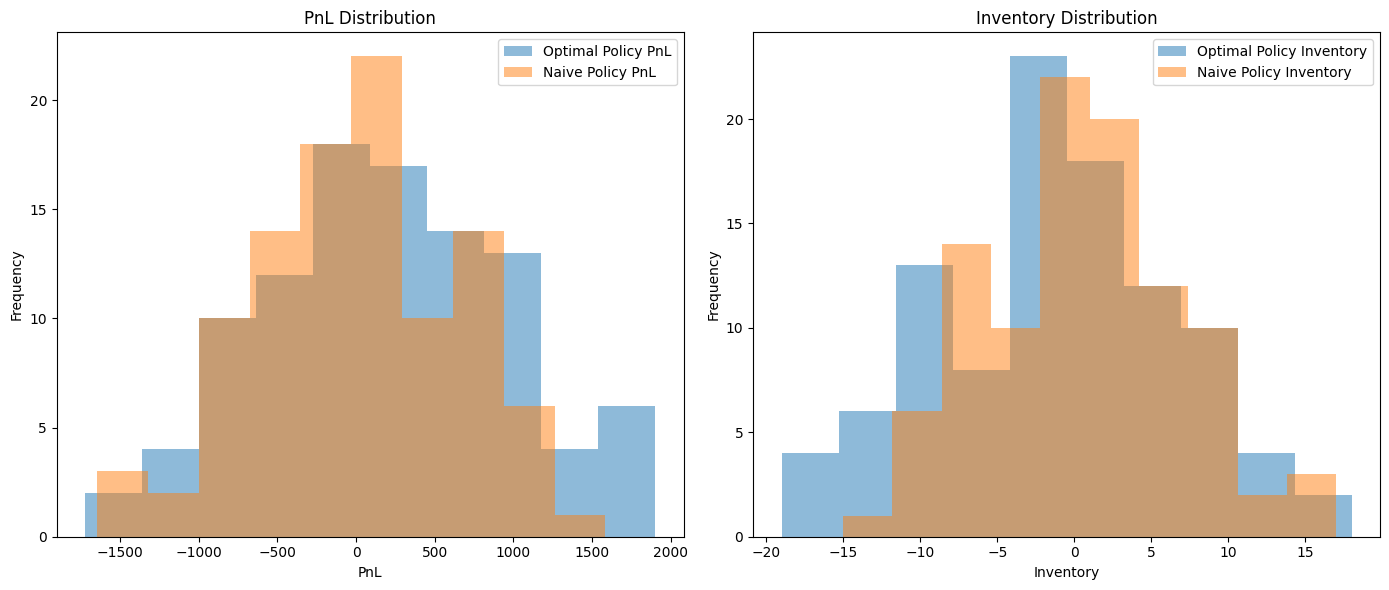

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Re-define parameters
S0, T, Delta_t, gamma, sigma, I0, k, c = 100, 1, 0.005, 0.1, 2, 0, 1.5, 140
num_steps, num_traces = int(T / Delta_t), 100
optimal_spread = 2  # This will be adjusted for the Naive Policy later

# Function to simulate a single trace for a given policy
def simulate_trace(policy, spread):
    S_t, I_t, PnL = S0, I0, 0
    for _ in range(num_steps):
        delta = sigma * np.sqrt(Delta_t) * np.random.choice([-1, 1])
        if policy == 'optimal':
            # Optimal Policy transaction probabilities
            prob_ask = c * np.exp(-k * spread / 2) * Delta_t
            prob_bid = c * np.exp(-k * spread / 2) * Delta_t
        else:
            # Naive Policy transaction probabilities
            prob_ask = c * np.exp(-k * spread / 2) * Delta_t
            prob_bid = c * np.exp(-k * spread / 2) * Delta_t
        
        # Transactions
        if np.random.rand() < prob_ask:
            I_t -= 1
            PnL += S_t + spread / 2  # Sell at ask price
        if np.random.rand() < prob_bid:
            I_t += 1
            PnL -= S_t - spread / 2  # Buy at bid price
        
        S_t += delta  # Update mid price
        
    return PnL, I_t

# Simulate traces for both policies
optimal_PnLs, optimal_Inventories, naive_PnLs, naive_Inventories = [], [], [], []
for _ in range(num_traces):
    PnL, Inventory = simulate_trace('optimal', optimal_spread)
    optimal_PnLs.append(PnL)
    optimal_Inventories.append(Inventory)
    
    PnL, Inventory = simulate_trace('naive', optimal_spread)  # Using the same spread for simplicity
    naive_PnLs.append(PnL)
    naive_Inventories.append(Inventory)

# Plotting the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(optimal_PnLs, alpha=0.5, label='Optimal Policy PnL')
plt.hist(naive_PnLs, alpha=0.5, label='Naive Policy PnL')
plt.title('PnL Distribution')
plt.xlabel('PnL')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(optimal_Inventories, alpha=0.5, label='Optimal Policy Inventory')
plt.hist(naive_Inventories, alpha=0.5, label='Naive Policy Inventory')
plt.title('Inventory Distribution')
plt.xlabel('Inventory')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## Question 3
Although the provided code contains a number of utilties for Monte-Carlo
prediction, you may consider writing re-writing these functions to
improve your understanding.

1.  We have written the function `mc_prediction` in
    [rl/monte_carlo.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/monte_carlo.py)
    as an implementation of Monte-Carlo Prediction with function
    approximation. You have also learnt that since Tabular MC Prediction
    is a special case of MC Prediction with Function Approximation and
    so, writing a separate function for Tabular MC Prediction is not
    necessary. But for a learning experience, it's a great idea to write
    a function for Tabular MC Prediction **from scratch**. Think about
    what the input and output types must be. Be sure to reduce the
    learning rate appropriately as a function of number of updates (or
    as a function of number of episodes).

2.  We have written the function `td_prediction` in
    [rl/td.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/td.py)
    as an implementation of Temporal-Difference Prediction with function
    approximation. You have also learnt that since Tabular TD Prediction
    is a special case of TD Prediction with Function Approximation and
    so, writing a separate function for Tabular TD Prediction is not
    necessary. But for a learning experience, it's a great idea to write
    a function for Tabular TD Prediction **from scratch**. Think about
    what the input and output types must be. Be sure to reduce the
    learning rate appropriately as a function of number of updates.

3.  Test your above implementations of Tabular MC Prediction and Tabular
    TD Prediction on\
    `SimpleInventoryMRPFinite` (from
    [rl/chapter2/simple_inventory_mrp.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter2/simple_inventory_mrp.py))
    by ensuring that your Value Function output matches that produced by
    the function approximation versions of MC Prediction and TD
    Prediction.

In [13]:
def tabular_mc_prediction(episodes, gamma, decay_function=None):
    V = {}  # Value function initialization
    returns_sum = {}  # Sum of returns for each state
    returns_count = {}  # Count of returns for each state
    
    for episode in episodes:
        G = 0  # Initialize the return for the current episode
        for state, action, reward in reversed(episode):
            G = gamma * G + reward  # Update the return
            if state not in returns_sum:
                returns_sum[state] = 0
                returns_count[state] = 0
                V[state] = 0  # Initialize value for unseen states
            returns_sum[state] += G
            returns_count[state] += 1
            alpha = 1 / returns_count[state] if decay_function is None else decay_function(returns_count[state])
            V[state] += alpha * (G - V[state])  # Update state value
    
    return V


In [14]:
def td_update(V, episode, alpha, gamma):
    for (state, reward, next_state) in episode:
        if next_state is not None:
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])
        else:
            V[state] += alpha * (reward - V[state])
    return V

In [11]:
import numpy as np
from collections import defaultdict, namedtuple

# Define the inventory state as a simple namedtuple for ease of use
InventoryState = namedtuple('InventoryState', ['on_hand', 'on_order'])

class SimpleInventoryMRPFinite:
    def __init__(self, capacity, poisson_lambda, holding_cost, stockout_cost):
        self.capacity = capacity
        self.poisson_lambda = poisson_lambda
        self.holding_cost = holding_cost
        self.stockout_cost = stockout_cost

    def simulate_transition(self, state):
        demand_sample = np.random.poisson(self.poisson_lambda)
        on_hand_after_demand = max(state.on_hand + state.on_order - demand_sample, 0)
        on_order = max(self.capacity - on_hand_after_demand, 0)  # Order up to capacity
        next_state = InventoryState(on_hand=on_hand_after_demand, on_order=on_order)
        # Correctly calculate inventory position and reward
        inventory_position = state.on_hand + state.on_order
        reward = -self.holding_cost * state.on_hand - self.stockout_cost * max(demand_sample - inventory_position, 0)
        return next_state, reward

    
    def inventory_position(self, state):
        return state.on_hand + state.on_order

def generate_episode(simple_inventory_mrp, max_time_steps=100):
    episode = []
    state = InventoryState(on_hand=0, on_order=simple_inventory_mrp.capacity)  # Starting state
    for _ in range(max_time_steps):
        next_state, reward = simple_inventory_mrp.simulate_transition(state)
        episode.append((state, reward, next_state))
        if next_state.on_hand == 0 and next_state.on_order == 0:
            break
        state = next_state
    return episode

def td_update(V, episode, alpha, gamma):
    for state, reward, next_state in episode:
        V[state] += alpha * (reward + gamma * V[next_state] - V[state])

def mc_update(V, episodes, gamma):
    returns = defaultdict(list)
    for episode in episodes:
        G = 0
        for state, reward, _ in reversed(episode):
            G = gamma * G + reward
            returns[state].append(G)
    for state, Gs in returns.items():
        V[state] = np.mean(Gs)

if __name__ == '__main__':
    capacity = 2
    poisson_lambda = 1.0
    holding_cost = 1.0
    stockout_cost = 10.0
    gamma = 0.9
    alpha = 0.1
    num_episodes = 10

    simple_inventory_mrp = SimpleInventoryMRPFinite(capacity, poisson_lambda, holding_cost, stockout_cost)
    V = defaultdict(float)

    for episode_num in range(1, num_episodes + 1):
        episode = generate_episode(simple_inventory_mrp)
        mc_update(V, [episode], gamma)
        print(f"Episode {episode_num}: Value Function {dict(V)}")

    # Assuming we use the last episode for TD update for illustrative purposes
    td_update(V, episode, alpha, gamma)
    print(f"After TD Update: Value Function {dict(V)}")


Episode 1: Value Function {InventoryState(on_hand=1, on_order=1): -23.317035944868234, InventoryState(on_hand=0, on_order=2): -17.83073935008723, InventoryState(on_hand=2, on_order=0): -24.23121282494466}
Episode 2: Value Function {InventoryState(on_hand=1, on_order=1): -18.66536477545264, InventoryState(on_hand=0, on_order=2): -14.569188505715845, InventoryState(on_hand=2, on_order=0): -20.000302354704324}
Episode 3: Value Function {InventoryState(on_hand=1, on_order=1): -17.799126548039123, InventoryState(on_hand=0, on_order=2): -20.70715438409972, InventoryState(on_hand=2, on_order=0): -17.86695941552141}
Episode 4: Value Function {InventoryState(on_hand=1, on_order=1): -27.562923632711264, InventoryState(on_hand=0, on_order=2): -27.829742970147603, InventoryState(on_hand=2, on_order=0): -34.505424611322596}
Episode 5: Value Function {InventoryState(on_hand=1, on_order=1): -16.01485538139614, InventoryState(on_hand=0, on_order=2): -17.81609557693912, InventoryState(on_hand=2, on_ord